## 马尔可夫链蒙特卡罗方法（MCMC）  
马尔可夫链蒙特卡罗方法（MCMC）是一种利用马尔可夫链从复杂概率分布中采样的技术  
本文将使用Python实现一种常见的MCMC算法——Metropolis-Hastings算法

### Metropolis-Hastings算法函数

Metropolis-Hastings算法是一种用于从复杂概率分布中生成样本的MCMC方法。其核心思想是构造  
一个马尔可夫链，  其平稳分布即为目标概率分布。通过不断迭代，我们可以从马尔可夫链中获得  
服从目标分布的样本。


### metropolis_hastings 函数接受以下内容作为输入:  
- 目标概率密度函数 target_pdf ;  
- 提议分布的标准差 proposal_std ;  
- 初始状态 initial_state ;  
- 迭代次数 iterations ;

### 初始化样本列表 samples，并将初始状态添加进去

### 在每次迭代中：  
   - 从对称的提议分布（以当前状态为均值的正态分布）中采样候选点 proposed_state。
   - 计算接受概率 acceptance_probability，它是目标分布在候选点和当前点处的概率密度之比。
   - 根据接受概率决定是否接受候选点。如果接受，则更新当前状态为候选点；否则，保持当前状态不变。
   - 将当前状态添加到样本列表中。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标分布的概率密度函数（以标准正态分布为例）
def target_distribution(x):
    return (1/np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

In [2]:
# Metropolis-Hastings算法实现
def metropolis_hastings(target_pdf, proposal_std, initial_state, iterations):
    samples = [initial_state]
    current_state = initial_state

    for i in range(iterations):
        # 从提议分布（对称的正态分布）中采样候选点
        proposed_state = np.random.normal(current_state, proposal_std)

        # 计算接受概率
        acceptance_ratio = target_pdf(proposed_state) / target_pdf(current_state)
        acceptance_probability = min(1, acceptance_ratio)

        # 决定是否接受候选点
        if np.random.rand() < acceptance_probability:
            current_state = proposed_state  # 接受候选点
        else:
            pass  # 保持当前状态

        samples.append(current_state)

    return np.array(samples)

### 参数设置

- `proposal_std`：提议分布的标准差，控制候选点的步长。
- `initial_state`：算法的起始点。
- `iterations`：总的迭代次数，即生成的样本数量。

In [3]:
# 参数设置
proposal_std = 1.0      # 提议分布的标准差
initial_state = 0.0     # 初始状态
iterations = 10000      # 迭代次数

### 运行算法并可视化

1. 调用 `metropolis_hastings` 函数，获取采样结果 `samples`。
2. 使用直方图和目标分布的概率密度函数对比，验证采样结果是否符合目标分布。
3. 绘制前1000个采样值的轨迹，观察马尔可夫链的收敛情况。

In [4]:
# 运行Metropolis-Hastings算法
samples = metropolis_hastings(target_distribution, proposal_std, initial_state, iterations)

(array([0.00215521, 0.00215521, 0.00574723, 0.01149446, 0.00502882,
        0.01580488, 0.02298891, 0.02658093, 0.04310421, 0.05100665,
        0.07327716, 0.09267405, 0.10704212, 0.13218624, 0.14799112,
        0.19684256, 0.2464124 , 0.29382703, 0.31681594, 0.32184477,
        0.40158756, 0.36782259, 0.40158756, 0.40877159, 0.37931705,
        0.37931705, 0.40374277, 0.35776494, 0.28448779, 0.29741905,
        0.27155652, 0.20402659, 0.16092238, 0.15158314, 0.13793347,
        0.09195565, 0.08333481, 0.05531707, 0.0617827 , 0.04741463,
        0.03663858, 0.02801774, 0.02298891, 0.01436807, 0.01077605,
        0.00502882, 0.0007184 , 0.0007184 , 0.00143681, 0.00143681]),
 array([-3.34516096, -3.20597733, -3.06679371, -2.92761009, -2.78842647,
        -2.64924285, -2.51005923, -2.3708756 , -2.23169198, -2.09250836,
        -1.95332474, -1.81414112, -1.6749575 , -1.53577388, -1.39659025,
        -1.25740663, -1.11822301, -0.97903939, -0.83985577, -0.70067215,
        -0.56148853, -0.42

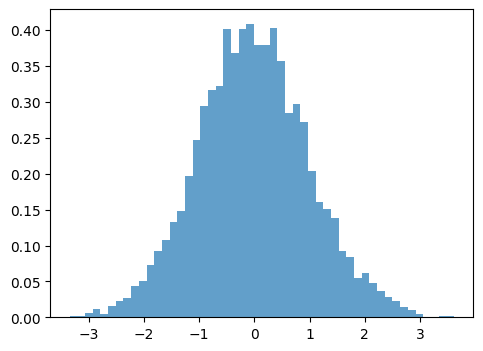

In [7]:
# 可视化结果
plt.figure(figsize=(12, 4))

# 直方图展示采样结果
plt.subplot(1, 2, 1)
plt.hist(samples, bins=50, density=True, alpha=0.7, label='MCMC Samples')

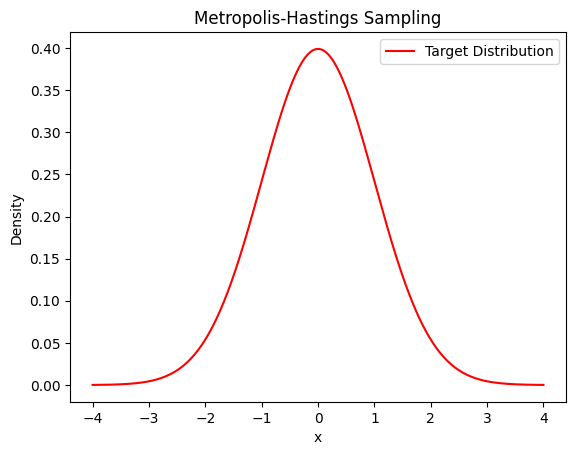

In [8]:
# 绘制目标分布的概率密度函数
x = np.linspace(-4, 4, 1000)
plt.plot(x, target_distribution(x), 'r', label='Target Distribution')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

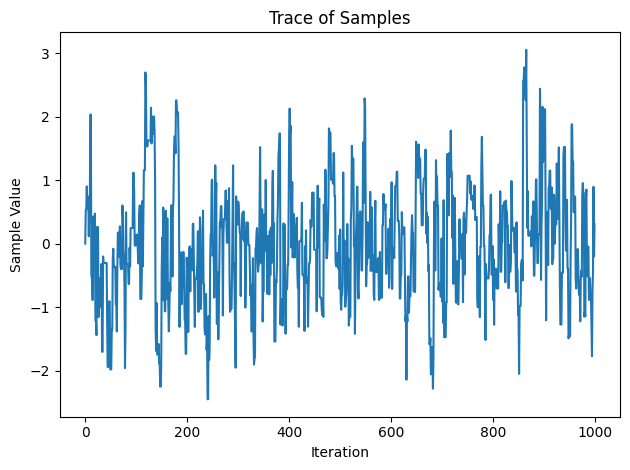

In [11]:
# 绘制采样值的轨迹
plt.plot(samples[:1000])
plt.title('Trace of Samples')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')

plt.tight_layout()
plt.show()

### 运行结果

- **采样分布**：直方图应与标准正态分布的曲线高度吻合，表明采样结果符合目标分布。
- **样本轨迹**：轨迹图显示采样值随迭代次数的变化，可以观察到在初始阶段（Burn-in期），  
样本可能远离目标分布的高密度区域，随着迭代的进行，样本逐渐稳定。

### 注意事项

1. **Burn-in期**：实际应用中，通常会丢弃初始的一段采样（Burn-in期的样本），以确保马尔可夫链已收敛到平稳分布。
2. **自相关性**：连续的样本之间可能存在相关性，可通过增加采样间隔（只保留每隔一定步数的样本）来减小自相关。
3. **提议分布的选择**：提议分布的参数（如标准差）会影响算法的效率和收敛性。步长过大或过小都会导致采样效果不佳，  
需要根据具体问题调整。
